In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = r"C:\Users\saina\OneDrive\Desktop\petsandhumans"

CATEGORIES = ["humans", "pets"]

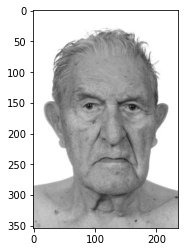

In [3]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [189 191 196 ... 195 194 193]
 [191 194 196 ... 196 196 196]
 [189 192 194 ... 196 196 196]]


In [5]:
print(img_array.shape)

(354, 236)


In [6]:
IMG_SIZE = 80

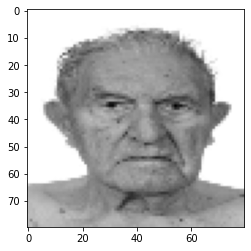

In [7]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()


100%|█████████████████████████████████████████████████████████████████████████████| 7100/7100 [00:07<00:00, 938.12it/s]


In [9]:
print(len(training_data))


14182


In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:100]:
    print(sample[1])

0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
1
1
1
0
0
1
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
0
0
0
1
1
1
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0


In [12]:
X = []
y = []

In [13]:
for features,label in training_data:
    X.append(features)
    y.append(label)


In [14]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

[[[[163]
   [166]
   [166]
   ...
   [185]
   [184]
   [183]]

  [[165]
   [166]
   [166]
   ...
   [188]
   [186]
   [186]]

  [[166]
   [167]
   [169]
   ...
   [187]
   [187]
   [188]]

  ...

  [[110]
   [115]
   [118]
   ...
   [168]
   [162]
   [156]]

  [[110]
   [113]
   [119]
   ...
   [164]
   [164]
   [158]]

  [[110]
   [120]
   [122]
   ...
   [169]
   [164]
   [157]]]]


In [15]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [16]:
X

array([[[[163],
         [166],
         [166],
         ...,
         [185],
         [184],
         [183]],

        [[165],
         [166],
         [166],
         ...,
         [188],
         [186],
         [186]],

        [[166],
         [167],
         [169],
         ...,
         [187],
         [187],
         [188]],

        ...,

        [[110],
         [115],
         [118],
         ...,
         [168],
         [162],
         [156]],

        [[110],
         [113],
         [119],
         ...,
         [164],
         [164],
         [158]],

        [[110],
         [120],
         [122],
         ...,
         [169],
         [164],
         [157]]],


       [[[ 89],
         [ 97],
         [ 99],
         ...,
         [168],
         [163],
         [155]],

        [[ 92],
         [ 95],
         [101],
         ...,
         [195],
         [193],
         [195]],

        [[ 95],
         [ 97],
         [101],
         ...,
         [218],
         [

In [17]:
y=np.array(y)

In [18]:
# Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:

In [19]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [20]:
# CNN

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [22]:
pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)

In [23]:
X=X/255.0

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [25]:
classifier = Sequential()


In [26]:
classifier.add(Convolution2D(32,kernel_size=(3,3),input_shape=(80,80,1),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64,kernel_size=(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(128,kernel_size=(3,3),activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0

In [27]:
classifier.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [29]:
history = classifier.fit(x_train, y_train, epochs=20, validation_split=0.1, callbacks = [stop, checkpoint])

Epoch 1/20
359/359 [==============================] - 55s 152ms/step - loss: 0.6336 - accuracy: 0.6595 - val_loss: 0.6209 - val_accuracy: 0.6672
Epoch 2/20
359/359 [==============================] - 54s 150ms/step - loss: 0.5431 - accuracy: 0.7195 - val_loss: 0.5062 - val_accuracy: 0.7510
Epoch 3/20
359/359 [==============================] - 54s 151ms/step - loss: 0.4955 - accuracy: 0.7593 - val_loss: 0.4514 - val_accuracy: 0.8003
Epoch 4/20
359/359 [==============================] - 54s 151ms/step - loss: 0.4311 - accuracy: 0.8000 - val_loss: 0.3906 - val_accuracy: 0.8348
Epoch 5/20
359/359 [==============================] - 54s 151ms/step - loss: 0.3779 - accuracy: 0.8325 - val_loss: 0.3624 - val_accuracy: 0.8520
Epoch 6/20
359/359 [==============================] - 55s 152ms/step - loss: 0.3421 - accuracy: 0.8537 - val_loss: 0.3537 - val_accuracy: 0.8434
Epoch 7/20
359/359 [==============================] - 54s 150ms/step - loss: 0.3052 - accuracy: 0.8730 - val_loss: 0.2848 - val_ac

In [32]:
loss, acc = classifier.evaluate(x_test,y_test,verbose=0)


In [33]:
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.11898893117904663
Test Accuracy: 0.9682875275611877


In [35]:
pred_test_gender=[]
for test in x_test:
    pred=classifier.predict(test.reshape(1,80,80,1))
    if pred>0.5:
        pred_test_gender.append(1)
    else:
        pred_test_gender.append(0)

In [36]:
pred_test_gender[0]


0

In [39]:
y_test[0]


0

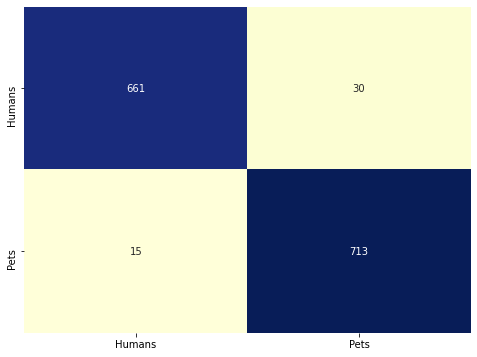

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cmat = confusion_matrix(y_test, pred_test_gender)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=["Humans","Pets"], yticklabels=["Humans","Pets"]);

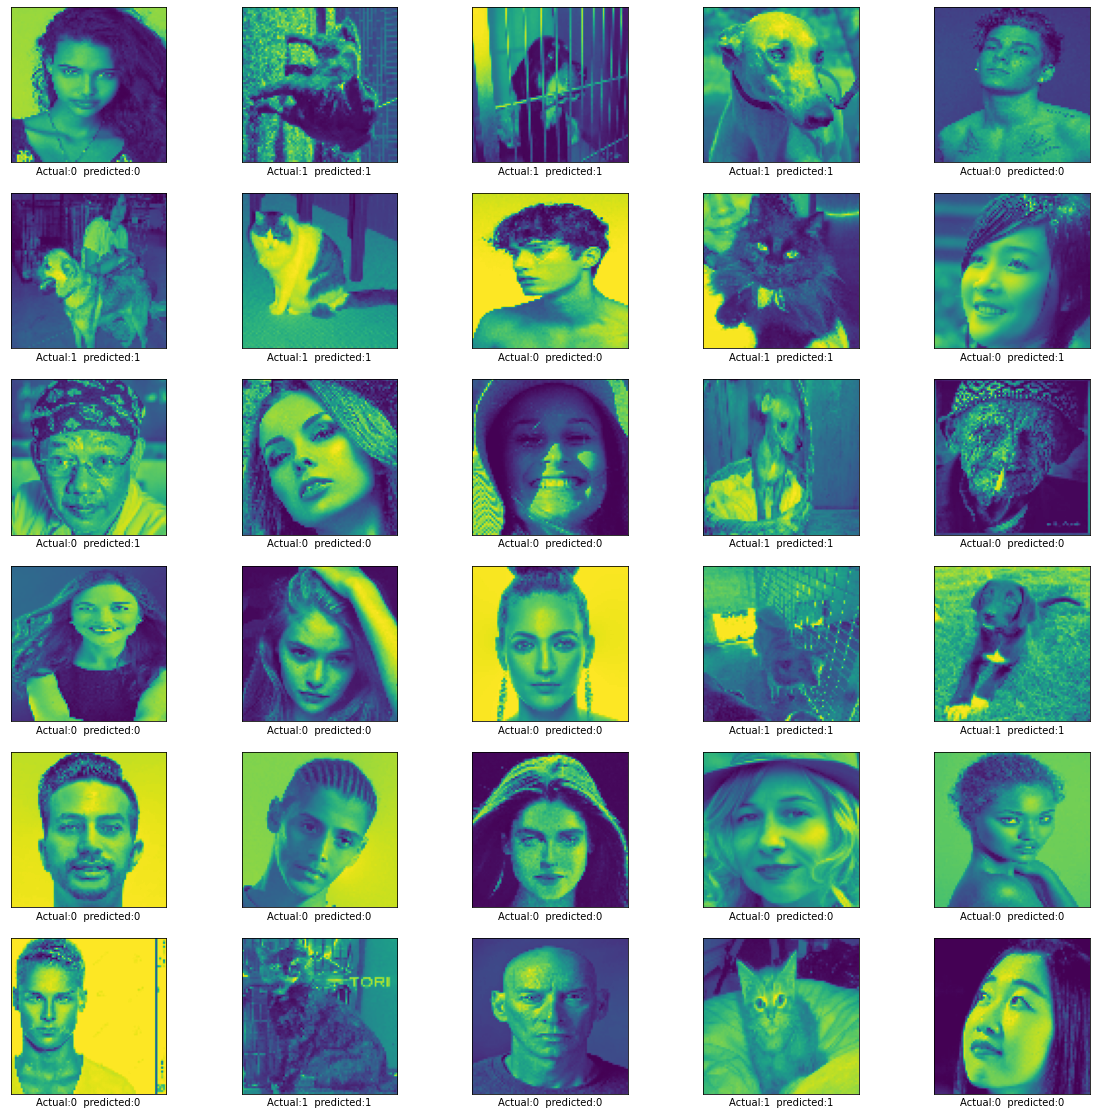

In [43]:
plt.figure(figsize=(20,20))
for i in range(0,30):
    plt.subplot(6,5,(i%30)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(
        "Actual:"+str(y_test[i])+"  predicted:"+str(pred_test_gender[i])
    )
plt.show()

<ipython-input-44-9947bbca275a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6,5,(i%30)+1)


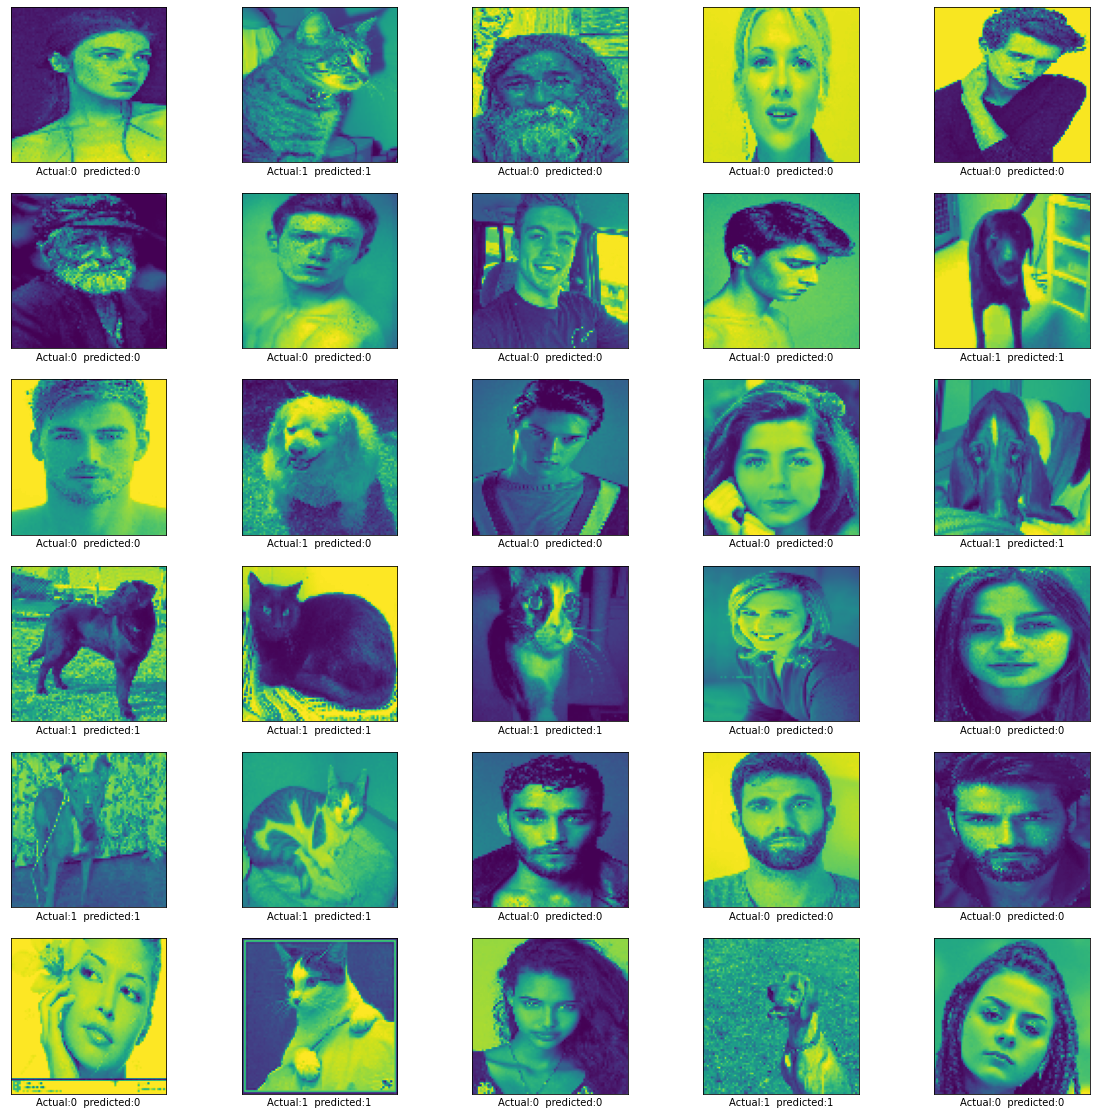

In [44]:
plt.figure(figsize=(20,20))
for i in range(200,250):
    plt.subplot(6,5,(i%30)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(
        "Actual:"+str(y_test[i])+"  predicted:"+str(pred_test_gender[i])
    )
plt.show()